In [ ]:
# Koneksi Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import dataset
!pip install roboflow
from roboflow import Roboflow

%cd /content/drive/MyDrive/Nabil/deteksi-api
rf = Roboflow(api_key="ub72gmB2Yom1GPxxfAQV")
project = rf.workspace("proyek").project("api-detection")
dataset = project.version(4).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=065ca457f03ced713a561093d7cbaabb7c02ef1170cae80e305c81a1a9c6a627
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found 

/content/drive/MyDrive/Nabil/deteksi-api
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.134`, to intall it `pip install ultralytics==8.0.134`.


Extracting Dataset Version Zip to Api-detection-4 in yolov8:: 100%|██████████| 2389/2389 [00:15<00:00, 153.85it/s]


In [ ]:
# Install YoloV8
!pip install ultralytics==8.0.114
from ultralytics import YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 11.3 MB/s eta 0:00:00


In [ ]:
#Training Model AI
%cd /content/drive/MyDrive/Nabil/deteksi-api/

!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/Nabil/deteksi-api/Api-detection-4/data.yaml epochs=50 plots=True

/content/drive/MyDrive/Nabil/deteksi-api
100% 21.5M/21.5M [00:00<00:00, 132MB/s] 
New https://pypi.org/project/ultralytics/8.0.123 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Nabil/deteksi-api/Api-detection-3/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_l

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Nabil/deteksi-api/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/Nabil/deteksi-api/Api-detection-3/data.yaml

Ultralytics YOLOv8.0.114 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Nabil/deteksi-api/Api-detection-3/valid/labels.cache... 240 images, 0 backgrounds, 0 corrupt: 100% 240/240 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 15/15 [00:06<00:00,  2.22it/s]
                   all        240        241       0.91      0.969      0.982      0.732
Speed: 1.0ms preprocess, 11.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val


In [ ]:
from IPython.display import Image

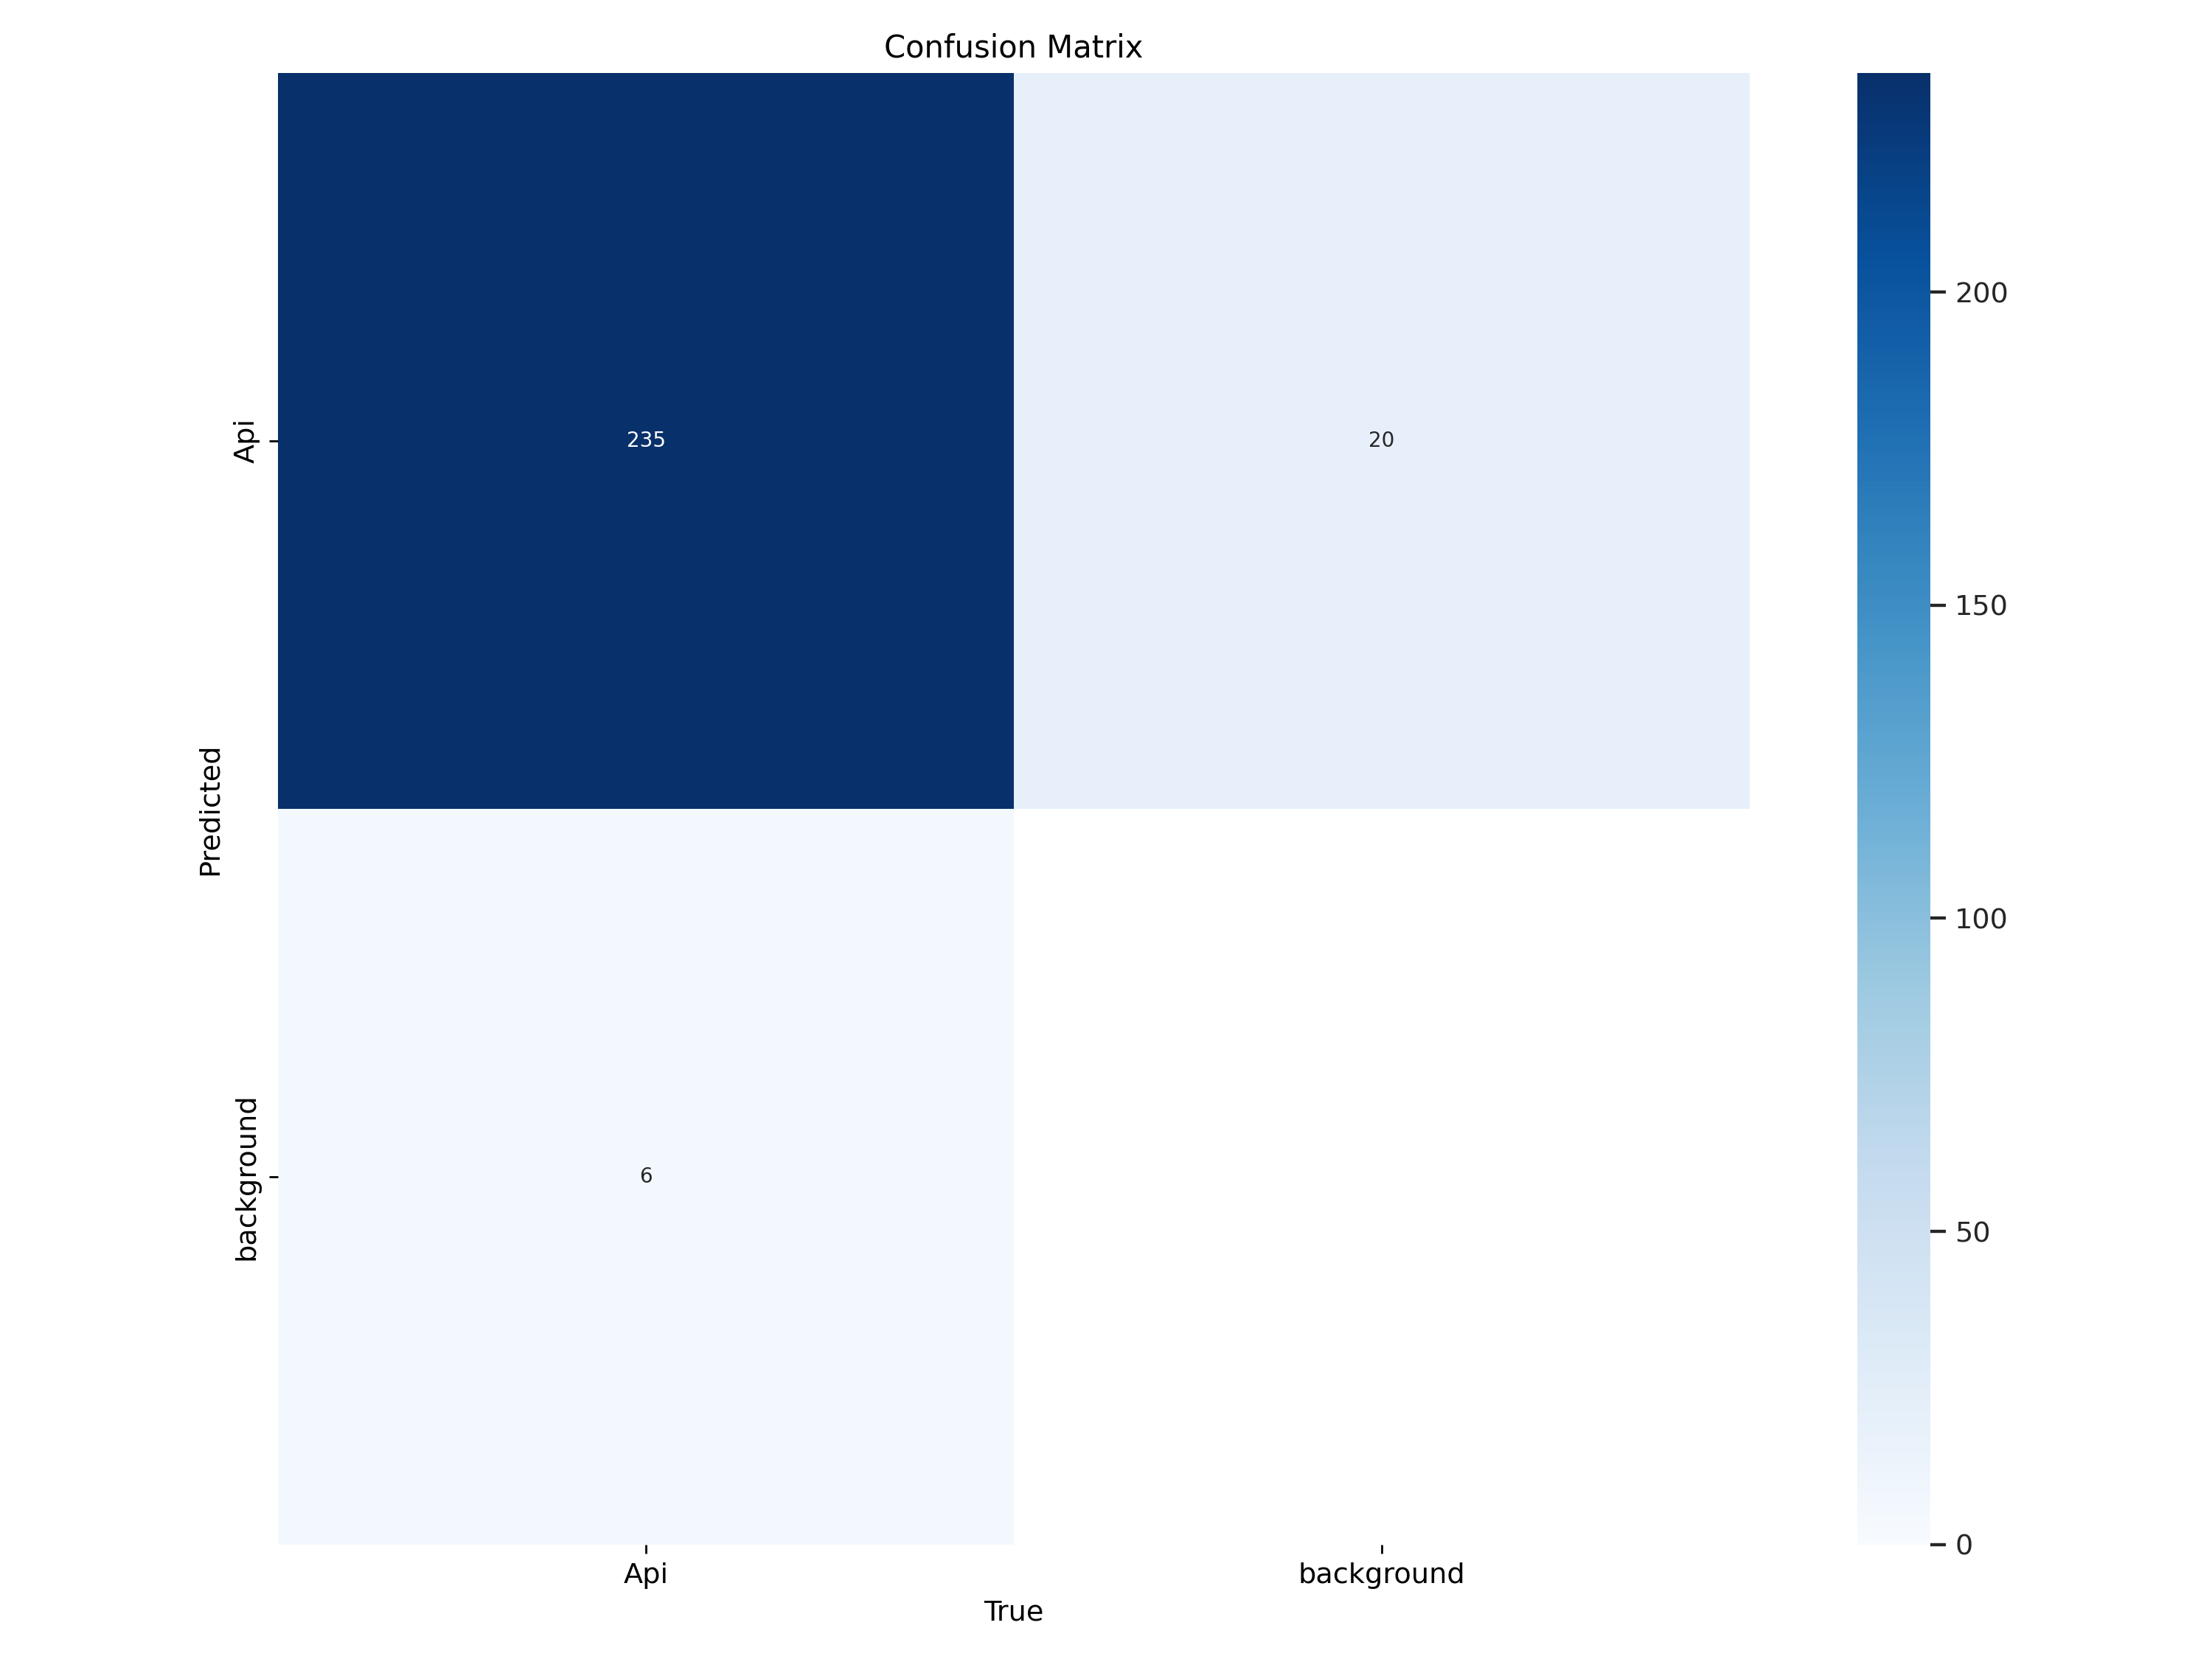

In [ ]:
#visualisasi Confusion Matrix
Image(filename=f'/content/drive/MyDrive/Nabil/deteksi-api/runs/detect/train3/confusion_matrix.png', width=600)